In [1]:
import numpy as np
import pandas as pd
import tweepy
from  datetime import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys: Enter your own API Keys....
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
target_user = ("BBCNews", "CBSNews", "CNN", "FoxNews", "nytimes")

In [5]:
# Variables for holding sentiments
sentiments = []

    
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [6]:
# Loop through each user
for user in target_user:
    
    #counter to be used for tweets ago count
    counter = 1


    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)
        
        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # Build a sentiments dict
            sentiments_dict = {"User": tweet["user"]["screen_name"],
                          "Date": tweet["created_at"], 
                          "Compound": compound,
                          "Positive": pos,
                          "Negative": neg,
                          "Neutral": neu,
                          "Tweets Ago": counter,
                          "Tweet Text": tweet["text"]}
        
            # Add to counter 
            counter = counter + 1
            
            # append sentiments dict to array
            sentiments.append(sentiments_dict)
            
    

In [7]:
len(sentiments)

500

In [8]:
sentiments_df = pd.DataFrame(sentiments)
sentiments_df = sentiments_df[["User", "Tweets Ago", "Date", "Compound", "Positive", "Negative", "Neutral", "Tweet Text"]]
sentiments_df.head()

,User,Tweets Ago,Date,Compound,Positive,Negative,Neutral,Tweet Text
0,BBCNews,1,Sat Nov 04 18:26:27 +0000 2017,-0.6908,0.00,0.416,0.584,Man charged over death of Chloe Miazek in Aber...
1,BBCNews,2,Sat Nov 04 17:57:34 +0000 2017,0.2500,0.20,0.000,0.800,Widower's bid to fulfil Hereford sweetheart's ...
2,BBCNews,3,Sat Nov 04 17:56:40 +0000 2017,0.0000,0.00,0.000,1.000,RT @BBCSport: GOAL! West Ham 0-2 Liverpool\n\n...
3,BBCNews,4,Sat Nov 04 17:19:22 +0000 2017,0.0000,0.00,0.000,1.000,Trump pitches for $2 trillion Saudi Aramco oil...
4,BBCNews,5,Sat Nov 04 16:58:52 +0000 2017,-0.3802,0.13,0.239,0.630,RT @BBCSport: There are some shocks around!\n\...


In [9]:
sentiments_df.to_csv("twitter_sentiments.csv", index= False, header= True )

In [10]:
bbcNews_df = sentiments_df.loc[sentiments_df["User"]=="BBCNews"]
bbcNews_scat = plt.scatter(range(len(bbcNews_df["Tweets Ago"])), bbcNews_df["Compound"], marker="o", facecolor="skyblue", edgecolors="black", label="BBCNews", alpha=0.8,)

In [11]:
CBSNews_df = sentiments_df.loc[sentiments_df["User"]=="CBSNews"]
CBSNews_scat = plt.scatter(range(len(CBSNews_df["Tweets Ago"])), CBSNews_df["Compound"], marker="o", facecolor="green", edgecolors="black", label="CBSNews", alpha=0.8,)

In [12]:
CNN_df = sentiments_df.loc[sentiments_df["User"]=="CNN"]
CNN_scat = plt.scatter(range(len(CNN_df["Tweets Ago"])), CNN_df["Compound"], marker="o", facecolor="red", edgecolors="black", label="CNN", alpha=0.8,)

In [13]:
FoxNews_df = sentiments_df.loc[sentiments_df["User"]=="FoxNews"]
FoxNews_scat = plt.scatter(range(len(FoxNews_df["Tweets Ago"])), FoxNews_df["Compound"], marker="o", facecolor="blue", edgecolors="black", label="FoxNews", alpha=0.8,)

In [14]:
nytimes_df = sentiments_df.loc[sentiments_df["User"]=="nytimes"]
nytimes_scat = plt.scatter(range(len(nytimes_df["Tweets Ago"])), nytimes_df["Compound"], marker="o", facecolor="yellow", edgecolors="black", label="NYTimes", alpha=0.8,)

In [15]:
plt.ylim(-1, 1)

(-1, 1)

In [16]:
plt.xlim(100, 0)

(100, 0)

In [17]:
# Plot Time Between Tweets

plt.title("Sentiment Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets ago")
plt.grid(True)


In [18]:
#legend
plt.legend(handles = [bbcNews_scat, CBSNews_scat, CNN_scat, FoxNews_scat, nytimes_scat], bbox_to_anchor=(1, 0.8))

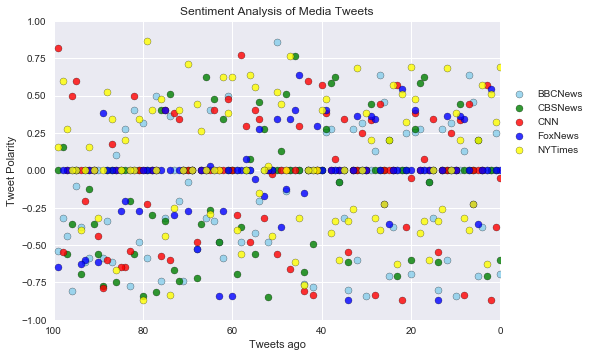

In [19]:
plt.savefig('sentiment_analysis_of_media_tweets.png')
plt.show()

In [20]:
news_org_group = sentiments_df.groupby(['User'])
news_org_group.head()

,User,Tweets Ago,Date,Compound,Positive,Negative,Neutral,Tweet Text
0,BBCNews,1,Sat Nov 04 18:26:27 +0000 2017,-0.6908,0.000,0.416,0.584,Man charged over death of Chloe Miazek in Aber...
1,BBCNews,2,Sat Nov 04 17:57:34 +0000 2017,0.2500,0.200,0.000,0.800,Widower's bid to fulfil Hereford sweetheart's ...
2,BBCNews,3,Sat Nov 04 17:56:40 +0000 2017,0.0000,0.000,0.000,1.000,RT @BBCSport: GOAL! West Ham 0-2 Liverpool\n\n...
3,BBCNews,4,Sat Nov 04 17:19:22 +0000 2017,0.0000,0.000,0.000,1.000,Trump pitches for $2 trillion Saudi Aramco oil...
4,BBCNews,5,Sat Nov 04 16:58:52 +0000 2017,-0.3802,0.130,0.239,0.630,RT @BBCSport: There are some shocks around!\n\...
100,CBSNews,1,Sat Nov 04 18:20:01 +0000 2017,-0.5994,0.000,0.218,0.782,Police are investigating the death of a Florid...
101,CBSNews,2,Sat Nov 04 18:00:02 +0000 2017,0.0000,0.000,0.000,1.000,Flights &amp; views that were once impossible ...
102,CBSNews,3,Sat Nov 04 17:40:01 +0000 2017,0.0000,0.000,0.000,1.000,Hundreds of pieces of art are on display from ...
103,CBSNews,4,Sat Nov 04 17:20:02 +0000 2017,-0.7096,0.000,0.258,0.742,Las Vegas shooter Stephen Paddock had been dep...
104,CBSNews,5,Sat Nov 04 17:18:13 +0000 2017,0.0000,0.000,0.000,1.000,WATCH: President Trump boards Air Force One as...


In [21]:
compound_mean = news_org_group['Compound'].mean()
compound_mean.head()

User
BBCNews   -0.146864
CBSNews   -0.091346
CNN       -0.029706
FoxNews   -0.029121
nytimes    0.048220
Name: Compound, dtype: float64

In [22]:
compound_mean_df = pd.DataFrame(compound_mean)
#compound_mean_df = compound_mean_df.reset_index()


In [23]:
compound_mean_df.head()

,Compound
User,
BBCNews,-0.146864
CBSNews,-0.091346
CNN,-0.029706
FoxNews,-0.029121
nytimes,0.048220


In [24]:
compound_mean_df["Compound"].plot.bar(figsize=(10,5), alpha=0.75, fontsize=12, color="rbygk")

plt.grid(True, linestyle='dashed')
plt.axhline(0, color='k')
plt.title("Overall Media Sentiment based on Twitter")
plt.ylabel("Tweet Polarity")
plt.xlabel("News Organization")


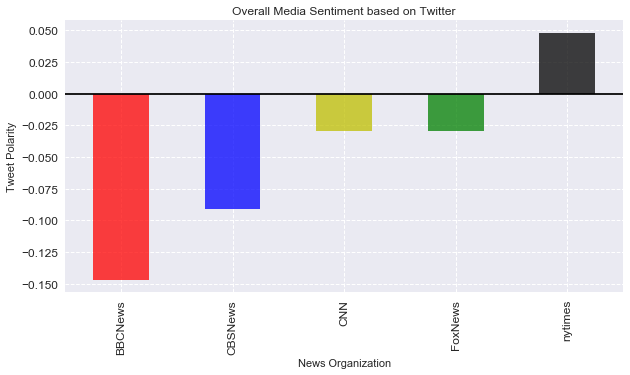

In [25]:
plt.savefig('sentiment_analysis_of_media_tweets.png')
plt.show()